In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/ModelosNoSupervisados2023/main/Viajes.csv")

In [4]:
df.head()

fecha                    GEO_1                    GEO_2  \
0  2019011936260    4.7246682,-74.0241998  4.65556449,-74.07458744   
1  2019091630910    4.6511427,-74.1463712     4.7109886,-74.072092   
2  2019061835152  4.71938952,-74.03346117  4.66880272,-74.07795599   
3  2019071223754   4.75547918,-74.1156075       4.720736,-74.05435   
4  2019110920498    4.7246682,-74.0241998  4.65556449,-74.07458744   

   Distancia_Km  Tiempo_A  
0        15.914  1.235278  
1        14.868  0.266944  
2         9.140  0.955278  
3        12.270  2.268611  
4        15.914  1.325833

In [5]:
nueva=df["GEO_1"].str.split(",",n=1,expand=True)

In [6]:
nueva.columns=["lat1","log1"]

In [7]:
nueva.head(2)

lat1         log1
0  4.7246682  -74.0241998
1  4.6511427  -74.1463712

In [8]:
nueva1=df["GEO_2"].str.split(",",n=1,expand=True)
nueva1.columns=["lat2","log2"]

In [9]:
nueva1.head(2)

lat2          log2
0  4.65556449  -74.07458744
1   4.7109886    -74.072092

In [10]:
df=pd.concat([df[["fecha","Distancia_Km","Tiempo_A"]],nueva,nueva1],axis=1)

In [11]:
df

fecha  Distancia_Km  Tiempo_A        lat1          log1  \
0     2019011936260        15.914  1.235278   4.7246682   -74.0241998   
1     2019091630910        14.868  0.266944   4.6511427   -74.1463712   
2     2019061835152         9.140  0.955278  4.71938952  -74.03346117   
3     2019071223754        12.270  2.268611  4.75547918   -74.1156075   
4     2019110920498        15.914  1.325833   4.7246682   -74.0241998   
...             ...           ...       ...         ...           ...   
9867  2019040305577         3.037  0.969722  4.64140226  -74.06132319   
9868  2019100100284         2.553  0.774444   4.5951339   -74.1516225   
9869  2019101124249         9.508  0.444167  4.68687909  -74.06561357   
9870  2019073162603         1.686  0.568611  4.66420531   -74.0611693   
9871  2019110921091         5.503  0.407778  4.67131235  -74.09425337   

            lat2          log2  
0     4.65556449  -74.07458744  
1      4.7109886    -74.072092  
2     4.66880272  -74.07795599  
3       4.720736     -74.05435  
4     4.65556449  -74.07458744  
...          ...           ...  
9867  4.65276758  -74.08003459  
9868  4.59418907  -74.14757548  
9869   4.7460123   -74.0455141  
9870  4.66740682   -74.0699808  
9871  4.66921868  -74.11534075  

[9872 rows x 7 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9872 entries, 0 to 9871
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         9872 non-null   object 
 1   Distancia_Km  9872 non-null   float64
 2   Tiempo_A      9872 non-null   float64
 3   lat1          9872 non-null   object 
 4   log1          9872 non-null   object 
 5   lat2          9872 non-null   object 
 6   log2          9872 non-null   object 
dtypes: float64(2), object(5)
memory usage: 540.0+ KB


In [13]:
df[["lat1","log1","lat2","log2"]]=df[["lat1","log1","lat2","log2"]].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9872 entries, 0 to 9871
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         9872 non-null   object 
 1   Distancia_Km  9872 non-null   float64
 2   Tiempo_A      9872 non-null   float64
 3   lat1          9872 non-null   float64
 4   log1          9872 non-null   float64
 5   lat2          9872 non-null   float64
 6   log2          9872 non-null   float64
dtypes: float64(6), object(1)
memory usage: 540.0+ KB


# **Algoritmo Kmeans**

In [15]:
X=df[['lat1', 'log1']]## Lugar o zonas de mayor demanda

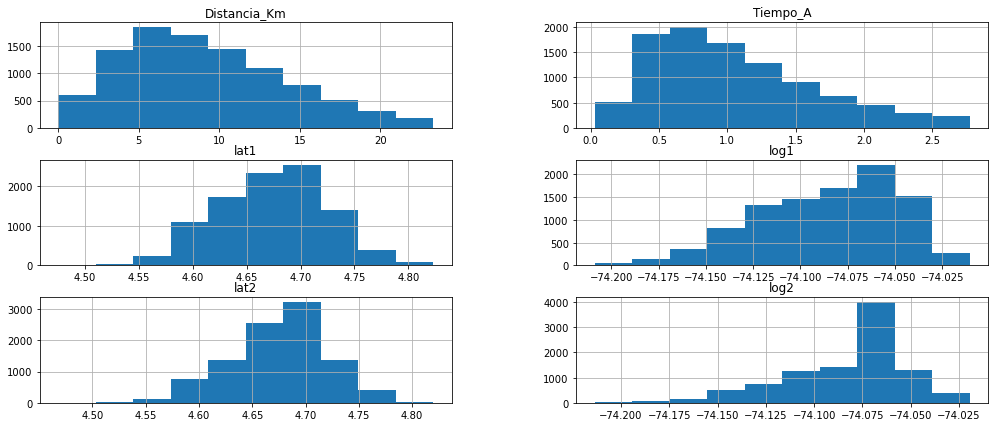

In [16]:
## Graficos
plt.rcParams["figure.figsize"]=(17,7)
df.hist()
plt.show()

In [17]:
X_scaled=scale(X)

In [18]:
X_scaled

array([[ 1.0243074 ,  1.66726694],
       [-0.43294424, -1.63058842],
       [ 0.91968567,  1.4172685 ],
       ...,
       [ 0.27533946,  0.54935699],
       [-0.17404753,  0.66932418],
       [-0.0331883 , -0.22373653]])

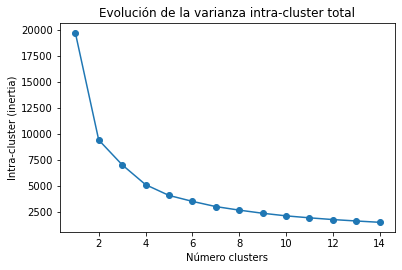

In [19]:
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 25, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

In [20]:
k=3

In [21]:
kmeans=KMeans(n_clusters=k,init="k-means++",random_state=123)
kmeans=kmeans.fit(X_scaled)

In [22]:
df["ClusterInicio"]=kmeans.labels_

In [23]:
df.head(12)

fecha  Distancia_Km  Tiempo_A      lat1       log1      lat2  \
0   2019011936260        15.914  1.235278  4.724668 -74.024200  4.655564   
1   2019091630910        14.868  0.266944  4.651143 -74.146371  4.710989   
2   2019061835152         9.140  0.955278  4.719390 -74.033461  4.668803   
3   2019071223754        12.270  2.268611  4.755479 -74.115607  4.720736   
4   2019110920498        15.914  1.325833  4.724668 -74.024200  4.655564   
5   2019041121965        21.168  1.869444  4.763693 -74.041348  4.599158   
6   2019050305573         0.528  0.184444  4.655762 -74.074021  4.653696   
7   2019082754736         4.724  2.549444  4.744060 -74.033812  4.761824   
8   2019070611029        12.041  0.946667  4.653206 -74.084265  4.588181   
9   2019021934691        12.445  0.449167  4.674417 -74.067183  4.761285   
10  2019062039114        16.263  0.672778  4.745172 -74.026842  4.681406   
11  2019050510311        17.525  1.218889  4.737965 -74.087243  4.618964   

         log2  ClusterInicio  
0  -74.074587              0  
1  -74.072092              2  
2  -74.077956              0  
3  -74.054350              0  
4  -74.074587              0  
5  -74.094479              0  
6  -74.076499              1  
7  -74.065077              0  
8  -74.139654              1  
9  -74.066560              1  
10 -74.086300              0  
11 -74.145144              0

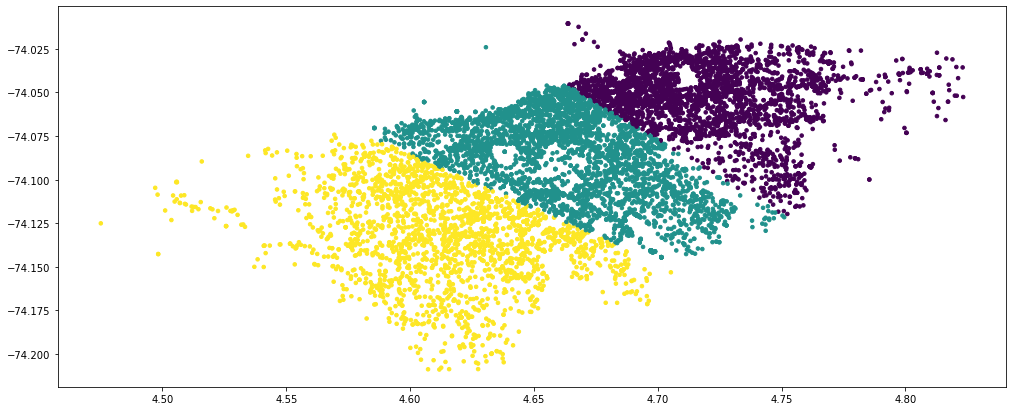

In [24]:
plt.scatter(df.lat1,df.log1,marker=".",c=df.ClusterInicio,s=50,cmap="viridis")
plt.show()

In [25]:
import plotly.express as px

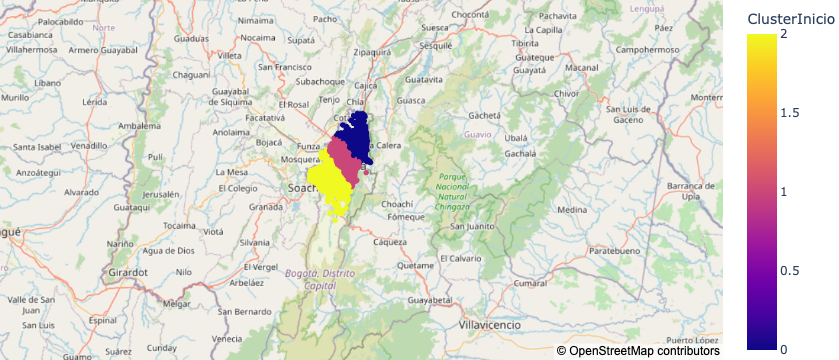

In [26]:
fig= px.scatter_mapbox(df,lat="lat1",lon="log1",color="ClusterInicio")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Hemos definido tres Zonas de mayor demanda en Bogota

In [27]:
df.head(2)

fecha  Distancia_Km  Tiempo_A      lat1       log1      lat2  \
0  2019011936260        15.914  1.235278  4.724668 -74.024200  4.655564   
1  2019091630910        14.868  0.266944  4.651143 -74.146371  4.710989   

        log2  ClusterInicio  
0 -74.074587              0  
1 -74.072092              2

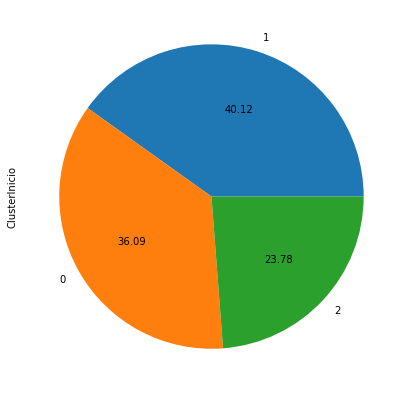

In [28]:
plot=df.ClusterInicio.value_counts().plot(kind="pie",autopct="%.2f")

In [29]:
from sklearn.ensemble import  RandomForestClassifier

In [30]:
df["ClusterInicio"]=df["ClusterInicio"].astype("category")

In [31]:
X=df[["lat1","lat2"]]
Y=df.ClusterInicio.values

In [32]:
from sklearn.model_selection import  train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123,stratify=Y)

In [34]:
print(x_train.shape)

(7897, 2)


In [35]:
print(len(y_test))

1975


In [36]:
Modelo_RF=RandomForestClassifier(criterion="gini",n_estimators=100,
                                bootstrap=True,random_state=1234)

In [37]:
Modelo_RF=Modelo_RF.fit(x_train,y_train)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import  metrics

In [39]:
# Error train
Predicciones_train_RF=Modelo_RF.predict(X=x_train)
Accuracy_RF_train=metrics.accuracy_score(y_train,Predicciones_train_RF)
print(Accuracy_RF_train)
Reporte_RF=metrics.classification_report(y_train,Predicciones_train_RF)
print(Reporte_RF)
precision, recall, fscore, support = score(y_train,Predicciones_train_RF)
f1_Score_RF_0=fscore[0]
f1_Score_RF_1=fscore[1]

0.9996201089021147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2850
           1       1.00      1.00      1.00      3169
           2       1.00      1.00      1.00      1878

    accuracy                           1.00      7897
   macro avg       1.00      1.00      1.00      7897
weighted avg       1.00      1.00      1.00      7897



In [40]:
Predicciones_test_RF=Modelo_RF.predict(X=x_test)
Accuracy_RF_test=metrics.accuracy_score(y_test,Predicciones_test_RF)
print(Accuracy_RF_test)
Reporte_RF_test=metrics.classification_report(y_test,Predicciones_test_RF)
print(Reporte_RF_test)
precision, recall, fscore, support = score(y_test,Predicciones_test_RF)
f1_Score_RF_0=fscore[0]
f1_Score_RF_1=fscore[1]

0.7321518987341772
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       713
           1       0.67      0.67      0.67       792
           2       0.75      0.66      0.70       470

    accuracy                           0.73      1975
   macro avg       0.74      0.73      0.73      1975
weighted avg       0.73      0.73      0.73      1975



In [41]:
Modelo_Final = RandomForestClassifier(criterion="entropy",oob_score=True)
Modelo_Final.fit(X ,Y)

RandomForestClassifier(criterion='entropy', oob_score=True)

In [42]:
df.head()

fecha  Distancia_Km  Tiempo_A      lat1       log1      lat2  \
0  2019011936260        15.914  1.235278  4.724668 -74.024200  4.655564   
1  2019091630910        14.868  0.266944  4.651143 -74.146371  4.710989   
2  2019061835152         9.140  0.955278  4.719390 -74.033461  4.668803   
3  2019071223754        12.270  2.268611  4.755479 -74.115607  4.720736   
4  2019110920498        15.914  1.325833  4.724668 -74.024200  4.655564   

        log2 ClusterInicio  
0 -74.074587             0  
1 -74.072092             2  
2 -74.077956             0  
3 -74.054350             0  
4 -74.074587             0

**Etiquetar Destino**

In [44]:
Destino=df[["lat2","log2"]]
Destino.columns=["lat1","lat2"]

In [45]:
PrediccionesZonaDestino=Modelo_Final.predict(Destino)

In [46]:
PrediccionesZonaDestino

array([2, 0, 1, ..., 0, 1, 1])

In [47]:
df["ClusterDestino"]=PrediccionesZonaDestino

In [48]:
df.head()

fecha  Distancia_Km  Tiempo_A      lat1       log1      lat2  \
0  2019011936260        15.914  1.235278  4.724668 -74.024200  4.655564   
1  2019091630910        14.868  0.266944  4.651143 -74.146371  4.710989   
2  2019061835152         9.140  0.955278  4.719390 -74.033461  4.668803   
3  2019071223754        12.270  2.268611  4.755479 -74.115607  4.720736   
4  2019110920498        15.914  1.325833  4.724668 -74.024200  4.655564   

        log2 ClusterInicio  ClusterDestino  
0 -74.074587             0               2  
1 -74.072092             2               0  
2 -74.077956             0               1  
3 -74.054350             0               0  
4 -74.074587             0               2

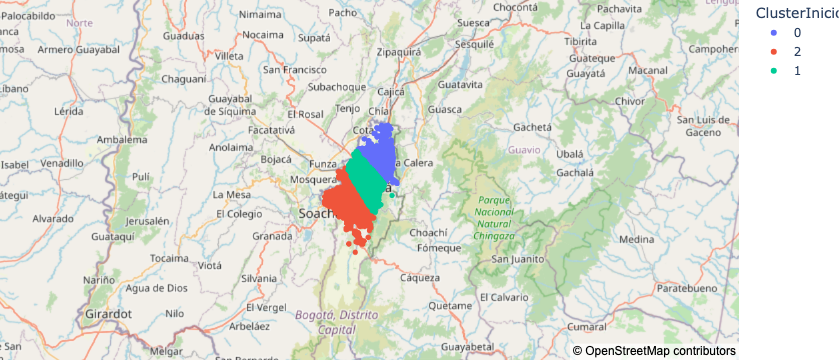

In [49]:
fig= px.scatter_mapbox(df,lat="lat1",lon="log1",color="ClusterInicio")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [50]:
# Inicio
lat1=4.714447
log1=-74.070231
# Destino
lat2=4.617859
log2= -74.087370

In [51]:
geo1=pd.DataFrame(data={"lat1":[lat1],"lon1":[log1]})

In [52]:
geo2=pd.DataFrame(data={"lat2":[lat2],"lon2":[log2]})

In [53]:
Zona1=Modelo_Final.predict(geo1)
Zona1

/Users/osgaspar/opt/anaconda3/envs/Personal/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- lon1
Feature names seen at fit time, yet now missing:
- lat2




array([0])

In [54]:
Zona2=Modelo_Final.predict(geo2)
Zona2

/Users/osgaspar/opt/anaconda3/envs/Personal/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- lon2
Feature names seen at fit time, yet now missing:
- lat1




array([2])